# Working with GeoDataFrames

This exercise is adapted from Kelsey Jordahl's SciPy tutorial, available here: 

https://github.com/kjordahl/SciPy-Tutorial-2015


In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from shapely.geometry import Point
import pandas as pd

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

We can easily read a shapefile. 

In [9]:
# we can easily read a shapefile
boros = gp.read_file('nybb_15b/nybb.shp')
boros

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...


We see that there are a few attributes, and that the geometry field contains the boundaries of each polygon. 

In [10]:
# set the index to be the name of the borough, and sort in order of the borough code
boros.reset_index(inplace=True)
boros.set_index('BoroName', inplace=True)
boros.sort_values(by='BoroCode', inplace=True)
boros

,index,BoroCode,Shape_Area,Shape_Leng,geometry
BoroName,,,,,
Manhattan,3,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,4,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,1,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,2,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,0,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...


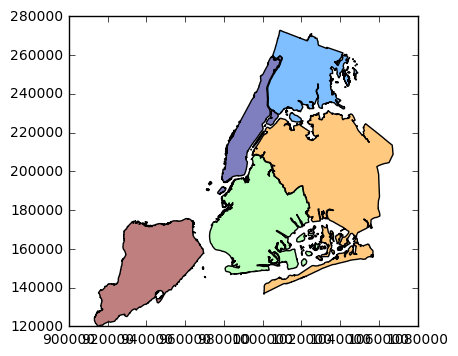

In [11]:
# we can easily plot these. 
p = boros.plot()

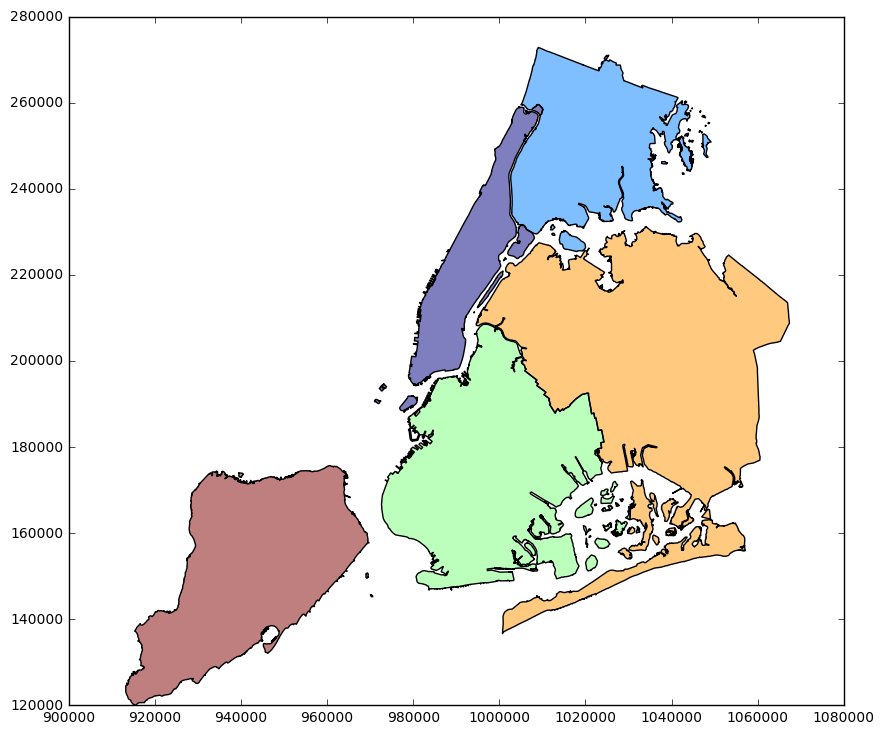

In [12]:
# or change the size of the figure
boros.plot(figsize=(10, 10))

Lots of style options are available.  Anything that can by passed to pyplot works: 

http://matplotlib.org/api/pyplot_summary.html

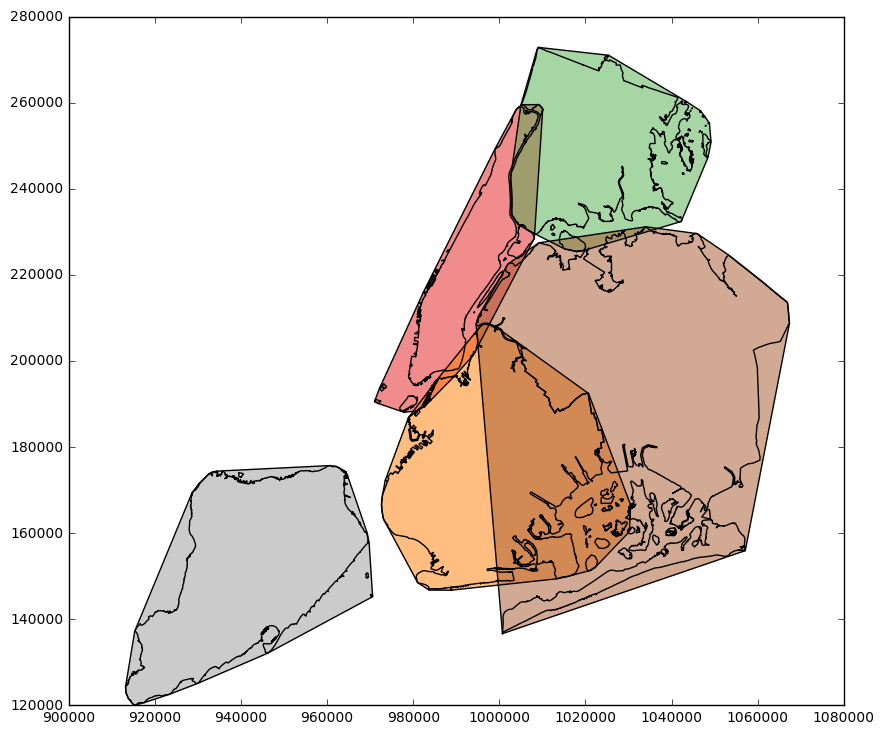

In [13]:
# if we want to overlay two maps, we create the first, and pass it 
# as the ax option to the second. 

base = boros.plot(figsize=(10, 10),alpha=0.0)

# here we are doing some geometric operations
boros.geometry.convex_hull.plot(ax=base, figsize=(10, 10))

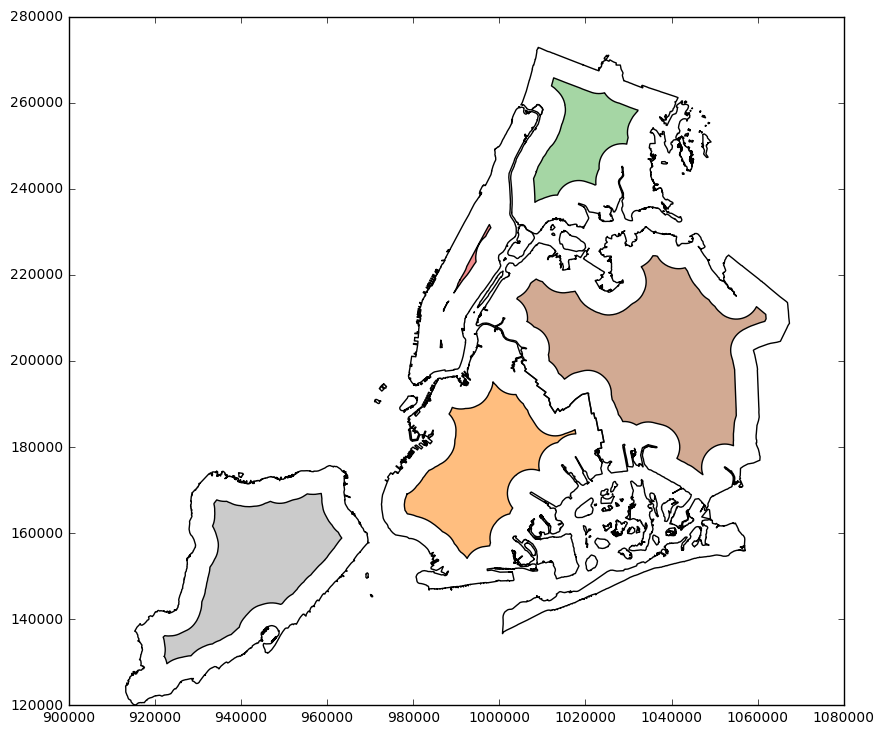

In [14]:
# we can calculate buffers
# the negative number indicates an inside buffer
# Here let's create a de-militirized zone between the boroughs

eroded = boros.geometry.buffer(-5280)
base = boros.plot(alpha=0.0, figsize=(10, 10))
eroded.plot(ax=base, figsize=(10, 10))

In [15]:
# the area attribute is automatic, so we can easily see the difference
eroded.area

BoroName
Manhattan        1.128785e+07
Bronx            3.371876e+08
Brooklyn         6.711072e+08
Queens           1.301421e+09
Staten Island    7.263977e+08
dtype: float64

In [16]:
boros.geometry.area

BoroName
Manhattan        6.364464e+08
Bronx            1.186974e+09
Brooklyn         1.937596e+09
Queens           3.045168e+09
Staten Island    1.623829e+09
dtype: float64

In [17]:
# calculate the fraction of the borough that is inland from the others

inland = eroded.area / boros.geometry.area
boros['inland_fraction'] = inland
boros

,index,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction
BoroName,,,,,,
Manhattan,3,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,0.017736
Bronx,4,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,0.284073
Brooklyn,1,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,0.346361
Queens,2,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,0.427373
Staten Island,0,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,0.447336


Let's create a normal pandas `Series` with population values for each borough from the 2010 census.

In [18]:
population = pd.Series({'Manhattan': 1585873, 'Bronx': 1385108, 'Brooklyn': 2504700,
                     'Queens': 2230722, 'Staten Island': 468730})
population

Bronx            1385108
Brooklyn         2504700
Manhattan        1585873
Queens           2230722
Staten Island     468730
dtype: int64

In [19]:
boros['population'] = population
boros

,index,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population
BoroName,,,,,,,
Manhattan,3,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,0.017736,1585873
Bronx,4,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,0.284073,1385108
Brooklyn,1,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,0.346361,2504700
Queens,2,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,0.427373,2230722
Staten Island,0,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,0.447336,468730


In [20]:
# calculate the population density in people per square mile
boros['pop_density'] = boros['population'] / boros.geometry.area * 5280 ** 2
boros.sort(columns='pop_density', ascending=False)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,index,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population,pop_density
BoroName,,,,,,,,
Manhattan,3,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,0.017736,1585873,69466.335981
Brooklyn,1,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,0.346361,2504700,36037.963313
Bronx,4,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,0.284073,1385108,32531.958243
Queens,2,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,0.427373,2230722,20422.174910
Staten Island,0,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,0.447336,468730,8047.300267


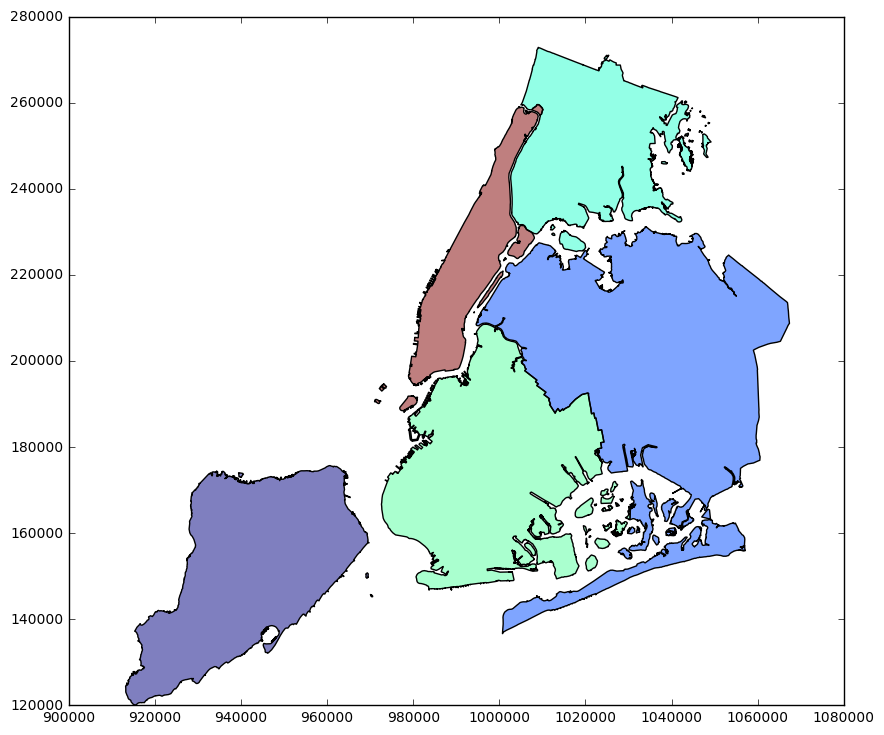

In [21]:
# if we specify a column name, we can make a chloropleth
#Chloropleth maps are maps where the color of each shape is based on the value of an associated variable. 

boros.plot(column='pop_density', figsize=(10, 10))

In [22]:
# we can save it to a shapefile, or to a geojson file
# note that a geojson is a simpler data format, so may be easier to work with

boros.to_file('boros.shp')
boros.to_file('boros.json', driver="GeoJSON")

## Interactive maps

We can easily send geopandas data to folium to make interactive maps 

In [23]:
import folium

# to do this we convert to a geojson object
# this contains all the necessary information
# we'll come back to the need for the to_crs conversion
gjson = boros.to_crs(epsg='4326').to_json()

# create the map
m = folium.Map([40.730610,-73.935242],
                tiles='Mapbox Bright',
                zoom_start=10)

# add the layer
folium.GeoJson(gjson,
               name='Boroughs'
              ).add_to(m)

# This lets us turn the layer on or off
folium.LayerControl().add_to(m)

# save it
m.save('boros.html')

## Working with projections

In the above, you noticed the to_crs() method.  This converts the data to a different coordinate reference system (CRS). This is a seris of parameters that defines the coordinate system and spatial extent of some data set. 

Basically, it is about going from a round earth to a flat map in various different ways, and for various different parts of the globe.  There are a bunch of these, but only a few seem to be commonly used.  

If you get points that don't show up on a map, or show up in the wrong place, it is often because your two map layers have a different CRS and you need to convert.  The codes and defintitions are all here: 

http://spatialreference.org/